## Angewandtes Quantencomputing Laborpraktikum WiSe 25/26

### Musterlösung zu Praktikum 3: Mehrere Qubits und Messungen (24.10.2025)

### Parameterisierte Schaltkreise in Qiskit

Qiskit erlaubt es auch, freie Parameter für die Winkel von Rotationsgattern zu benutzen. 

Die freien Parameter können mit der Klasse ``ParameterVector(name, anzahl)`` von Qiskit erstellt werden:

```python
p = ParameterVector('θ', 3)
```

Die Variable ``p`` ist nun eine Liste mit 3 Einträgen, die einzelnen Parameter können mit ``p[0]`` etc adressiert werden. 
Diese Parameter können als Winkel in Rotationsgattern genutzt werden:

```python
quantum_circuit.rx(p[0], 0)
```

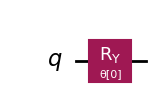

In [1]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector

# Initialisiert einen leeren Quantenschaltkreis mit einem Qubit
quantum_circuit = QuantumCircuit(1)

# Qiskit bietet auch die Möglichkeit, freie Parameter für parametrisierte Gatter zu verwenden
p = ParameterVector('θ', 1)
# Fügt eine parametrische Rotationsgatter um die Y-Achse hinzu
quantum_circuit.ry(p[0], 0)  

# Generiert eine visuelle Darstellung des Schaltkreises
quantum_circuit.draw('mpl')

Der resultierende Quantenzustand eines Quantenschaltkreis kann mittels der Bloch-Sphäre visualisiert werden. Wir nutzen dafür die Hilfsfunktion ``sv_interactive_blochsphere`` und übergeben ihr den Quantenschaltkreis. 
Enthält der Schaltkreis freie Parameter, so können diese interaktiv geändert werden.

In [2]:
from qc_lecture_tools.statevector import sv_interactive_blochsphere, sv_state

sv_interactive_blochsphere(quantum_circuit)

### Aufgabe 1: Rotationsgatter

Wir nutzen nun den Code von oben um mit den Rotationsgattern zu experimentieren.

**Aufgabe 1.1:** Finden Sie ein Rotationsgatter und einen passenden Winkel um den Quantenzustand auf die $\ket{1}$ zu drehen (dies entspricht dem Südpol). Der Ausgangspunkt ist jeweils der Nordpol mit dem $\ket{0}$ Zustand.

In [3]:
quantum_circuit = QuantumCircuit(1)

p = ParameterVector('θ', 1)
quantum_circuit.ry(p[0], 0)
sv_interactive_blochsphere(quantum_circuit) # Winkel zu 1.0pi ändern


**Aufgabe 1.2:** Finden Sie nun ein Rotationsgatter und einen passenden Winkel um den Quantenzustand auf die X-Achse zu drehen (dort wo in dem Schaubilds das x ist).

In [ ]:
quantum_circuit = QuantumCircuit(1)

p = ParameterVector('θ', 1)
quantum_circuit.ry(p[0], 0)
sv_interactive_blochsphere(quantum_circuit) # Winkel zu 0.5pi ändern


**Aufgabe 1.3:** Finden Sie nun ein Rotationsgatter und einen passenden Winkel um den Quantenzustand auf die Y-Achse zu drehen (dort wo in dem Schaubilds das y ist).

In [5]:
quantum_circuit = QuantumCircuit(1)

p = ParameterVector('θ', 1)
quantum_circuit.rx(p[0], 0)
sv_interactive_blochsphere(quantum_circuit) # Winkel zu -0.5pi ändern


### Aufgabe 2: Mehrere Qubits

Einen Quantenschaltkreis mit mehreren Qubits können wir in Qiskit folgendermaßen bauen:

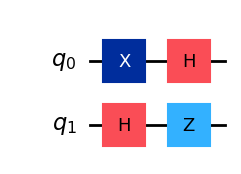

<IPython.core.display.Math object>

In [6]:
# Initialisiert einen leeren Quantenschaltkreis mit zwei Qubits
quantum_circuit = QuantumCircuit(2)

# Gatter von Qubit 1
quantum_circuit.x(0)
quantum_circuit.h(0)

# Gatter von Qubit 2
quantum_circuit.h(1)
quantum_circuit.z(1)

display(quantum_circuit.draw('mpl'))
display(sv_state(quantum_circuit, "Quantenzustand: "))


**Aufgabe 2.1:** Findem Sie einen Schaltkreis, der folgenden Zustand baut (nur ein Gatter ist notwendig):
$\ket{\Psi_1} = \frac{\sqrt{2}}{2} \ket{00} + \frac{\sqrt{2}}{2} \ket{10}$

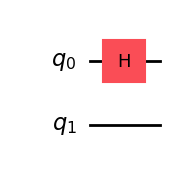

<IPython.core.display.Math object>

In [7]:
quantum_circuit = QuantumCircuit(2)
quantum_circuit.h(0)
display(quantum_circuit.draw('mpl'))
display(sv_state(quantum_circuit, "Quantenzustand: "))

**Aufgabe 2.2:** Nun einen Schaltkreis, der einen ähnlichen Zustand baut, aber die Werte sind vertauscht:
$\ket{\Psi_2} = \frac{\sqrt{2}}{2} \ket{00} + \frac{\sqrt{2}}{2} \ket{01}$

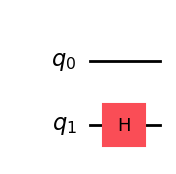

<IPython.core.display.Math object>

In [8]:
quantum_circuit = QuantumCircuit(2)
quantum_circuit.h(1)
display(quantum_circuit.draw('mpl'))
display(sv_state(quantum_circuit, "Quantenzustand: "))

**Aufgabe 2.3:** Was passiert, wenn ich jeweils ein Hadamard-Gatter auf Qubit 1 und Qubit 2 anwende? 

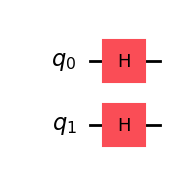

<IPython.core.display.Math object>

In [9]:
quantum_circuit = QuantumCircuit(2)
quantum_circuit.h(0)
quantum_circuit.h(1)
display(quantum_circuit.draw('mpl'))
display(sv_state(quantum_circuit, "Quantenzustand: "))

**Beobachtung:** Gleiche Werte für die Amplituden (Vorfaktoren). In diesem Zustand sind alle Wahrscheinlichkeiten gleich. 

**Aufgabe 2.4:** Wie schaut das ganze für drei Qubits aus? Was beobachten Sie hier?

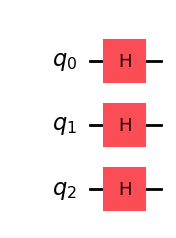

<IPython.core.display.Math object>

In [10]:
quantum_circuit = QuantumCircuit(3)
quantum_circuit.h(0)
quantum_circuit.h(1)
quantum_circuit.h(2)
display(quantum_circuit.draw('mpl'))
display(sv_state(quantum_circuit, "Quantenzustand: "))

**Beobachtung:** Alle Zustände mit der gleichen Amplitude, also auch gleichen Wahrscheinlichkeit. Insgesamt $8=2^3$ Zustände 

**Aufgabe 2.5:** Wir gehen wieder zurück zu zwei Qubits und starten wieder mit dem Zustand aus Aufgabe 2.2 (zwei Hadamard-Gatter auf Qubit 1 und Qubit 2). 

Untersuchen Sie, was mit dem Quantenzustand passiert, wenn man nun ein Pauli-Z Gatter auf Qubit 1 anwendet?

Wie schaut es aus, wenn das Pauli-Z Gatter auf Qubit 2 angewendet wird?

Was erwarten Sie, wenn Sie das Z Gatter auf beide Qubits anwenden?

(Erinnerung: $Z\ket{0}= \ket0$ und $Z\ket{1}= -\ket{1}$) 

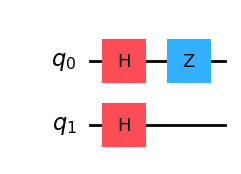

<IPython.core.display.Math object>

In [11]:
quantum_circuit = QuantumCircuit(2)
quantum_circuit.h(0)
quantum_circuit.h(1)
quantum_circuit.z(0)
display(quantum_circuit.draw('mpl'))
display(sv_state(quantum_circuit, "Quantenzustand: "))

**Beobachtung:** Das Pauli-Z Gatter wirkt nur auf das erste Qubit und ändert dort dementsprechend bei einem 1-Zustand das Vorzeichen.  

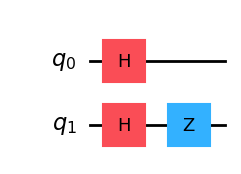

<IPython.core.display.Math object>

In [12]:
quantum_circuit = QuantumCircuit(2)
quantum_circuit.h(0)
quantum_circuit.h(1)
quantum_circuit.z(1)
display(quantum_circuit.draw('mpl'))
display(sv_state(quantum_circuit, "Quantenzustand: "))

**Beobachtung:** Das Pauli-Z Gatter wirkt jetzt nur auf das zweite Qubit und ändert in dem Gesamtzustand nur dort das Vorzeichen, wo im zweiten Qubit eine 1 steht. 

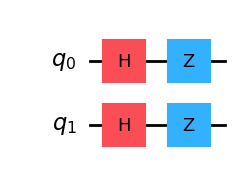

<IPython.core.display.Math object>

In [13]:
quantum_circuit = QuantumCircuit(2)
quantum_circuit.h(0)
quantum_circuit.h(1)
quantum_circuit.z(0)
quantum_circuit.z(1)
display(quantum_circuit.draw('mpl'))
display(sv_state(quantum_circuit, "Quantenzustand: "))

**Beobachtung:** Wenden wir nun beide Pauli-Z Gatter an, dann bekommen wir für jede 1 in einem Zustand den Faktor -1. Im letzten Zustand sind zwei 1er, deshalb dort $(-1)(-1) = 1$

**Aufgabe 2.6:** 
Wenden wir nun in den folgenden Aufgaben das Wissen aus Aufgabe 2.5 an.
Finden Sie einen Schaltkreis für folgenden Zustand:
$\frac{1}{2} \ket{00} + \frac{1}{2} \ket{01} + \frac{i}{2} \ket{10} + \frac{i}{2} \ket{11}$

**Hinweis:** $S\ket{0} = \ket{0}$ und $S\ket{1} = i\ket{1}$

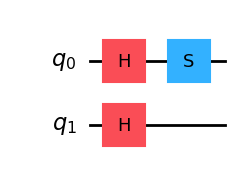

<IPython.core.display.Math object>

In [14]:
quantum_circuit = QuantumCircuit(2)
quantum_circuit.h(0)
quantum_circuit.h(1)
quantum_circuit.s(0)
display(quantum_circuit.draw('mpl'))
display(sv_state(quantum_circuit, "Quantenzustand: "))

**Aufgabe 2.7:** Finden Sie einen Schaltkreis für folgenden Zustand:
$\frac{1}{2} \ket{00} + \frac{i}{2} \ket{01} + \frac{1}{2} \ket{10}  + \frac{i}{2} \ket{11}$

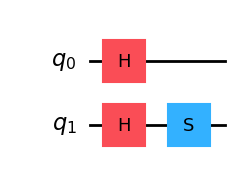

<IPython.core.display.Math object>

In [15]:
quantum_circuit = QuantumCircuit(2)
quantum_circuit.h(0)
quantum_circuit.h(1)
quantum_circuit.s(1)
display(quantum_circuit.draw('mpl'))
display(sv_state(quantum_circuit, "Quantenzustand: "))

**Aufgabe 2.8:** Finden Sie einen Schaltkreis für folgenden Zustand:
$\frac{1}{2} \ket{00} + \frac{i}{2} \ket{01} + \frac{i}{2} \ket{10}  -\frac{1}{2} \ket{11}$

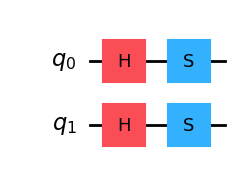

<IPython.core.display.Math object>

In [16]:
quantum_circuit = QuantumCircuit(2)
quantum_circuit.h(0)
quantum_circuit.h(1)
quantum_circuit.s(0)
quantum_circuit.s(1)
display(quantum_circuit.draw('mpl'))
display(sv_state(quantum_circuit, "Quantenzustand: "))

### Aufgabe 3: Verknüpfung von Quantenzuständen mit dem Tensorprodukt

**Erinnerung:** Das Tensorprodukt zweier Zustände $\ket{\psi_1}$ und $\ket{\psi_2}$ wird wie folgt gebildet:

$\ket{\psi_1} \otimes \ket{\psi_2} = (\alpha_1 \ket{0} + \beta_1 \ket{1}) \otimes (\alpha_2 \ket{0} + \beta_2 \ket{1}) = \alpha_1 \beta_1 \ket{00} + \alpha_1 \beta_2 \ket{01} + \beta_1\alpha_2  \ket{10} + \beta_1 \beta_2 \ket{11}$

Damit können zwei 1-Qubit Zustände zu einem 2-Qubit Zustand verknüpft werden.  

Mit der Hilfsfunktion ``sv_tensor`` können wir zwei beliebige Quantenzustände in Python verknüpfen.

In [17]:
# Beispiel für die Benutzung von sv_tensor
from qc_lecture_tools.statevector import sv_tensor

quantum_circuit1 = QuantumCircuit(1)
quantum_circuit1.h(0)

quantum_circuit2 = QuantumCircuit(1)
quantum_circuit2.x(0)

sv_tensor(quantum_circuit1, quantum_circuit2)

<IPython.core.display.Math object>

**Aufgabe 3.1:** Was passiert, wenn man die folgenden Quantenzustände miteinander verbindet:

```python
quantum_circuit1 = QuantumCircuit(1)
quantum_circuit1.x(0)
quantum_circuit1.h(0)
```

und

```python
quantum_circuit2 = QuantumCircuit(1)
quantum_circuit2.h(0)
quantum_circuit2.z(0)
```

Vergleichen Sie das Ergebnis mit dem gesamten zwei Qubit Schaltkreis.


In [18]:
quantum_circuit1 = QuantumCircuit(1)
quantum_circuit1.x(0)
quantum_circuit1.h(0)

quantum_circuit2 = QuantumCircuit(1)
quantum_circuit2.h(0)
quantum_circuit2.z(0)

sv_tensor(quantum_circuit1, quantum_circuit2)

<IPython.core.display.Math object>

In [19]:
quantum_circuit = QuantumCircuit(2)
quantum_circuit.x(0)
quantum_circuit.h(0)
quantum_circuit.h(1)
quantum_circuit.z(1)
sv_state(quantum_circuit, "Quantenzustand: ")

<IPython.core.display.Math object>

**Beobachtung:** Wenn man die einzelnen 1-Qubit Zustände miteinander kombiniert, kommt das gleiche raus wie wenn man den Schaltkreis gemeinsam als 2-Qubit Zustand berechnet. 
Das gilt tatsächlich allgemein: Solange nur 1-Qubit Gatter im Schaltkreis vorkommen, können diese auf die zugehörigen Qubits einzeln angewendet werden, und die Zustände anschließend kombiniert.  

**Aufgabe 3.2:** Nun machen wir das ganze mit Rotationsgattern:

```python
quantum_circuit1 = QuantumCircuit(1)
quantum_circuit1.ry(270*np.pi/180,0)
```

und

```python
quantum_circuit2 = QuantumCircuit(1)
quantum_circuit2.ry(60*np.pi/180,0)
```
Was passiert hier mit den Messwahrscheinlichkeiten der einzelnen Qubits und
des zwei Qubit Zustands? (``sv_probs``)

In [20]:
from qc_lecture_tools.statevector import sv_probs
quantum_circuit = QuantumCircuit(2)
quantum_circuit.x(0)
display(sv_probs(quantum_circuit, " Messwahrscheinlichkeiten"))

 Messwahrscheinlichkeiten


<IPython.core.display.Math object>

In [21]:
quantum_circuit1 = QuantumCircuit(1)
quantum_circuit1.ry(270*np.pi/180,0)

quantum_circuit2 = QuantumCircuit(1)
quantum_circuit2.ry(60*np.pi/180,0)

# Gemeinsamer Zustand aus den zwei einzelnen Zuständen:
sv_tensor(quantum_circuit1, quantum_circuit2)


<IPython.core.display.Math object>

In [22]:
display(sv_probs(quantum_circuit1, " Messwahrscheinlichkeiten Qubit 1:"))
display(sv_probs(quantum_circuit2, " Messwahrscheinlichkeiten Qubit 2:"))

quantum_circuit = QuantumCircuit(2)
quantum_circuit.ry(270*np.pi/180,0)
quantum_circuit.ry(60*np.pi/180,1)
display(sv_probs(quantum_circuit, " Messwahrscheinlichkeiten 2-Qubits:"))

 Messwahrscheinlichkeiten Qubit 1:


<IPython.core.display.Math object>

 Messwahrscheinlichkeiten Qubit 2:


<IPython.core.display.Math object>

 Messwahrscheinlichkeiten 2-Qubits:


<IPython.core.display.Math object>

### Aufgabe 4: Messungen

Bisher haben wir uns nur die mathematische Formel von Quantenzuständen angeschaut. Tatsächlich können wir diese nicht beobachten sondern nur die Wahrscheinlichkeiten durch statistische Messungen approximieren. 

Um Messungen in Qiskit einführen zu können, definieren wir zuerst klassische Bits, in denen wir das Ergebnis von Messungen speichern können. Das erste Argument von QuantumCircuit beinhaltet 
die Anzahl der Qubits, das zweite Argument die Anzahl der klassischen Bits:

```python
QuantumCircuit(num_qubits, num_bits)
```

Messungen können in Qiskit nun mit der ``measure`` Funktion hinzugefügt werden:

```python
quantum_circuit.measure(0,0)
```
Der erste Index ist hier das Qubit, das gemessen werden soll, der zweite Index das klassische Bit.


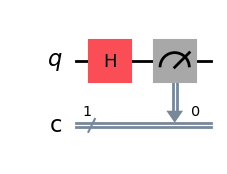

In [23]:
# So sieht der Code in Qiskit aus
quantum_circuit = QuantumCircuit(1,1)
quantum_circuit.h(0)
quantum_circuit.measure(0,0)
quantum_circuit.draw('mpl')

In Qiskit wird ein sogenanntes klassisches Tegister mit dem Namen ``c`` hinzugefügt, in dem die gemessenen Bits (1 oder 0) gespeichert sind.
Die doppelten Striche bedeuten, dass die Information kein Quantenzustand mehr ist sondern ganz klassische Information in Form von 0 oder 1. 

**Aufgabe 4.1:** Erzeugen Sie einen Quantenschaltkreis, in dem zwei Qubits mit Hadamard-Gatter in den Superpositions zustand gebracht werden und dann ausgemessen werden. 

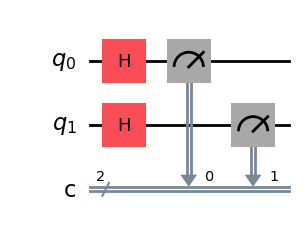

In [24]:
quantum_circuit = QuantumCircuit(2,2)
quantum_circuit.h(0)
quantum_circuit.h(1)
quantum_circuit.measure(0,0)
quantum_circuit.measure(1,1)
quantum_circuit.draw('mpl')

#### Simulierte Messungen mit Qiskit

Nun wollen wir mit den Messungen starten. Dazu muss man zunächst festlegen, wie oft gemessen werden soll. In der Fachsprache wird für eine Messung auch der Begriff ``shots`` genutzt.
Die Anzahl der Messungen bestimmt die Genauigkeit, mit der wir unsere Messwahrscheinlichkeiten approximieren können. 

Das Ergebnis unsere Messungen ist eine Reihe von gemessenen Bitstrings (Kombinationen aus 1en und 0en). Diese werden oft in Python Dictionaries zusammengefasst:

```python
result = {"00":15, "01":20, "10":35, "11":30}
```

Da die Qiskit-Syntax gedacht ist, Sie auf dem echten Quantencomputer auszuführen und dementsprechend Kompliziert ist, nutzen wir zunächst wieder eine Hilfsfunktion:

```python
sample_from_circuit(quantum_circuit, num_shots=1024)
```

Die Anzahl von Messungen kann mit ``num_shots`` festgelegt werden (0 ist nicht zulässig). Als Ergebnis bekommt man ein Python Dictionary zurück mit der Anzahl der gemessenen Zustände. 


In [25]:
from qc_lecture_tools.sampling import sample_from_circuit

quantum_circuit = QuantumCircuit(2,2)
quantum_circuit.h(0)
quantum_circuit.x(0)

display(sv_state(quantum_circuit, "Quantenzustand:"))
display(sv_probs(quantum_circuit, " Messwahrscheinlichkeiten vor der Messung:"))

quantum_circuit.measure(0,0)
quantum_circuit.measure(1,1)

sample_from_circuit(quantum_circuit, num_shots=1000)

<IPython.core.display.Math object>

 Messwahrscheinlichkeiten vor der Messung:


<IPython.core.display.Math object>

{'00': 521, '10': 479}

**Aufgabe 4.2:** Bauen Sie zunächst einen Quantenschaltkreis mit zwei Qubits mit einer gleichen Wahrscheinlichkeit für alle Zustände und messen Sie beide Qubits aus.
Nutzen Sie die Funktion `sample_from_circuit`, um 500 Messungen durchzuführen.

In [26]:
from qc_lecture_tools.sampling import sample_from_circuit

quantum_circuit = QuantumCircuit(2,2)
quantum_circuit.h(0)
quantum_circuit.h(1)

display(sv_state(quantum_circuit, "Quantenzustand:"))
display(sv_probs(quantum_circuit, " Messwahrscheinlichkeiten vor der Messung:"))

quantum_circuit.measure(0,0)
quantum_circuit.measure(1,1)

sample_from_circuit(quantum_circuit, num_shots=500)

<IPython.core.display.Math object>

 Messwahrscheinlichkeiten vor der Messung:


<IPython.core.display.Math object>

{'01': 129, '11': 132, '10': 115, '00': 124}

**Aufgabe 4.3:** Berechnen Sie die gemessenen Wahrscheinlichkeiten aus den Messergebnissen.

**Hinweis 1:** Die Wahrscheinlichkeiten ergeben sich durch die Anzahl der Messungen des einzelnen Zustands geteilt durch die gesamte Anzahl an Messungen.

Wenn Sie möchten, können Sie dafür eine Python-Funktion schreiben:
```python
def measure_to_probs(results_dict):
    #TODO
    return probs # Auch dictionary, nur mit gemessenen Wahrscheinlichkeiten
```

**Hinweis 2:** Python-Dictionaries können Sie folgendermaßen nutzen:

In [27]:
results = {"00":15, "01":20, "10": 35, "11":30}

print("Anzahl Messungen für Zustand 00:",results["00"])
print("Gemessene Zustände:", results.keys())
print("Alle Werte der Messungen:", results.values())

# Schleife über alle gemessenen Zustände
for state in results.keys():
    print(f"Zustand {state} wurde {results[state]} mal gemessen.")

#Leeres Dictionary:
results = {}
# Neuen Eintrag hinzufügen:
results["00"] = 15

Anzahl Messungen für Zustand 00: 15
Gemessene Zustände: dict_keys(['00', '01', '10', '11'])
Alle Werte der Messungen: dict_values([15, 20, 35, 30])
Zustand 00 wurde 15 mal gemessen.
Zustand 01 wurde 20 mal gemessen.
Zustand 10 wurde 35 mal gemessen.
Zustand 11 wurde 30 mal gemessen.


In [28]:
# Lösung für die Funktion:

def measure_to_probability(measurements: dict) -> dict:
    probs = {}
    total_counts = sum(measurements.values())
    for state in measurements.keys():
        probs[state] = measurements[state] / total_counts
    return probs

In [29]:
measurements = sample_from_circuit(quantum_circuit, num_shots=500)

measure_to_probability(measurements)

{'11': 0.278, '10': 0.24, '01': 0.238, '00': 0.244}

**Aufgabe 4.4:** Wiederholen Sie Aufgabe 4.3 für eine verschiedene Anzahl von Messungen 
(z.B. 100, 500, 1000, 5000, 10000) und vergleichen Sie die gemessenen Wahrscheinlichkeiten mit den theoretischen (hier 0.25).

Berechnen Sie dazu die Differenz zwischen den gemessenen und den theoretischen Wahrscheinlichkeiten. 

**Hinweis:** Falls Sie in Aufgabe 4.3 die Funktion ``measure_to_probability`` noch nicht selbst implementiert haben, können Sie Sie hier aus der Hilfsbibliothek importieren.

In [30]:
from qc_lecture_tools.sampling import measure_to_probability

In [31]:
# Theoretische Wahrscheinlichkeit für alle Zustände: 0.25

for shots in [100,500,1000,5000,10000]:
    measurements = sample_from_circuit(quantum_circuit, num_shots=shots)
    probabilities = measure_to_probability(measurements)
    print("Anzahl Messungen:", shots)
    print(probabilities)
    error_00 = abs(probabilities["00"] - 0.25)
    error_01 = abs(probabilities["01"] - 0.25)
    error_10 = abs(probabilities["10"] - 0.25)
    error_11 = abs(probabilities["11"] - 0.25)
    print(f'Fehler: 00: {error_00:.3f}, 01: {error_01:.3f}, 10: {error_10:.3f}, 11: {error_11:.3f}')

Anzahl Messungen: 100
{'00': 0.24, '10': 0.31, '01': 0.18, '11': 0.27}
Fehler: 00: 0.010, 01: 0.070, 10: 0.060, 11: 0.020
Anzahl Messungen: 500
{'11': 0.244, '01': 0.232, '10': 0.274, '00': 0.25}
Fehler: 00: 0.000, 01: 0.018, 10: 0.024, 11: 0.006
Anzahl Messungen: 1000
{'01': 0.243, '11': 0.264, '10': 0.24, '00': 0.253}
Fehler: 00: 0.003, 01: 0.007, 10: 0.010, 11: 0.014
Anzahl Messungen: 5000
{'00': 0.244, '10': 0.2524, '01': 0.2504, '11': 0.2532}
Fehler: 00: 0.006, 01: 0.000, 10: 0.002, 11: 0.003
Anzahl Messungen: 10000
{'11': 0.2443, '00': 0.247, '10': 0.2485, '01': 0.2602}
Fehler: 00: 0.003, 01: 0.010, 10: 0.002, 11: 0.006


**Bonusaufgabe (schwieriger):** Um die Beziehung zwischen den Fehlern und der Anzahl von Messungen genauer zu analysieren, erstellen Sie einen Plot mit ``matplotlib``: Auf der x-Achse die Anzahl der Messungen, auf der Y-Achse der Fehler. Sie können es für einen der 4 Zustände machen oder über alle Fehler summieren. 

**Hinweis 1:** Nehmen Sie den absoluten Fehler ohne Vorzeichen (``np.abs(-1)=1``)

**Hinweis 2:** Da die Abweichungen (Varianz) bei wenigen Messungen sehr hoch ist. Kann man die Messungen auch wiederholen und den Durchschnitt bilden, dann bekommt meine eine schönere und genauere Kurve.

**Hinweis 3:** Die Summe über eine Liste kann in Python mit ``sum()`` gebildet werden.  

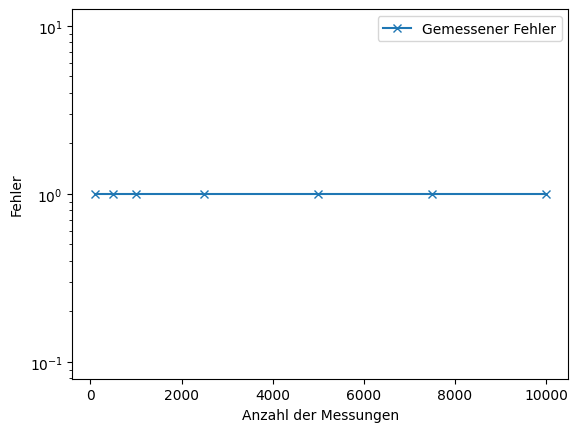

In [32]:
# Rahmen für den Plot

x_shots = [100,500,1000,2500,5000,7500,10000]
y_fehler =[]

for shots in x_shots:
    #TODO: Berechne den Fehler für einen Zustand (z.B. "00" oder die Summe über alle Fehler) und füge ihn zu y_fehler hinzu
    y_fehler.append(1.0)

import matplotlib.pyplot as plt
plt.semilogy(x_shots, y_fehler, '-x', label="Gemessener Fehler")

plt.xlabel("Anzahl der Messungen")
plt.ylabel("Fehler")
plt.legend()

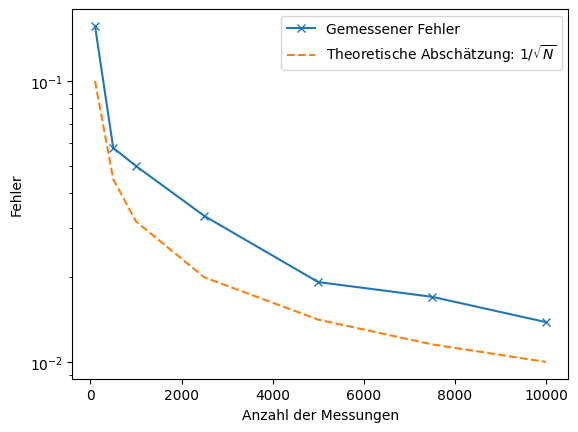

In [33]:
x_shots = [100,500,1000,2500,5000,7500,10000]
y_fehler =[]

for shots in x_shots:
    # Wir führen die Messungen mehrmals durch, um den statistischen Fehler zu verringern
    num_repeat = 20
    # Wir summieren die Fehler über alle Wiederholungen und bilden am Ende den Durchschnitt
    durchschnitts_fehler = 0
    for repeat in range(num_repeat):
    
        measurements = sample_from_circuit(quantum_circuit, num_shots=shots)
        probs = measure_to_probability(measurements)
        # Summe über alle Fehler der Zustände 
        fehler = sum([np.abs(probs[state]-0.25) for state in probs.keys()])
        durchschnitts_fehler += fehler
    
    # Bilden des Durchschnitts über alle Wiederholungen
    fehler = durchschnitts_fehler / num_repeat
    
    y_fehler.append(fehler)

import matplotlib.pyplot as plt
plt.semilogy(x_shots, y_fehler, '-x', label="Gemessener Fehler")

# Plot der theoretischen Funktion 1/sqrt(shots)
plt.semilogy(x_shots, 1/np.sqrt(x_shots), '--', label="Theoretische Abschätzung: $1/\\sqrt{N}$")

plt.xlabel("Anzahl der Messungen")
plt.ylabel("Fehler")
plt.legend()
